In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-bundych/Lesson_7/step_1_lesson_7.csv')
data

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [4]:
data_pivot = pd.pivot(data=data, index = 'date', columns='user_type', values='visits').reset_index()
data_pivot

user_type,date,People,Robots
0,2020-06-15,417.0,177.0
1,2020-06-16,472.0,91.0
2,2020-06-17,475.0,138.0


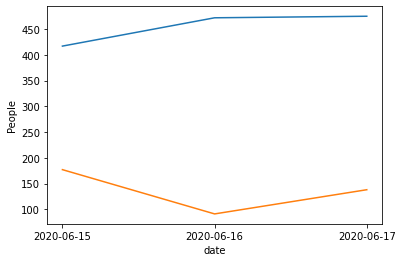

In [5]:
sns.lineplot(data=data_pivot, x='date', y='People')
sns.lineplot(data=data_pivot, x='date', y='Robots')

In [6]:
data_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-bundych/Lesson_7/step_2_lesson_7.csv')
data_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [7]:
chrome = data_2[data_2['browser'] == 'Google Chrome']['visits']
total = data_2['visits'].sum()

round(chrome / total * 100, 0)

0    60.0
Name: visits, dtype: float64

In [8]:
total

594.0

In [9]:
data_3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-bundych/Lesson_7/step_3_lesson_7.csv')
data_3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [10]:

#браузер с максимальной долей ботов от общего числа пользователей

total = data_3.groupby(['browser', 'user_type'], as_index=False).agg({'visits': 'sum'}) \
        .pivot(index='browser', columns='user_type', values='visits').reset_index().fillna(0)
total['total'] = total['People'] + total['Robots']
total ['robots_perc'] = total['Robots'] / total['total']
total.sort_values('robots_perc', ascending=False)

user_type,browser,People,Robots,total,robots_perc
11,UCWEB,0.0,4.0,4.0,1.000000
9,Safari,19.0,22.0,41.0,0.536585
5,Firefox,27.0,31.0,58.0,0.534483
2,Chromium,1.0,1.0,2.0,0.500000
8,Opera,11.0,5.0,16.0,0.312500
6,Google Chrome,250.0,104.0,354.0,0.293785
4,Edge,4.0,1.0,5.0,0.200000
13,Yandex Browser,47.0,7.0,54.0,0.129630
10,Samsung Internet,8.0,1.0,9.0,0.111111
7,Mobile Safari,15.0,1.0,16.0,0.062500


In [11]:
# процент пользоватлей Сафари

data_4 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-bundych/Lesson_7/step_4_lesson_7.csv')

data_4
data_4_n = data_4.groupby(['browser', 'user_type'], as_index=False).agg({'visits': 'sum'})
data_4_n['score'] = round(data_4_n.visits / data_4_n.visits.sum()*100, 1)
data_4_n[data_4_n['browser'] == 'Safari']

,browser,user_type,visits,score
15,Safari,People,19.0,3.2
16,Safari,Robots,22.0,3.7


In [12]:
data_4_n = data_4_n.reset_index()
data_4_n

,index,browser,user_type,visits,score
0,0,Android Browser,People,1.0,0.2
1,1,Chrome Mobile,People,31.0,5.2
2,2,Chromium,People,1.0,0.2
3,3,Chromium,Robots,1.0,0.2
4,4,CocCoc,People,1.0,0.2
5,5,Edge,People,4.0,0.7
6,6,Edge,Robots,1.0,0.2
7,7,Firefox,People,27.0,4.5
8,8,Firefox,Robots,31.0,5.2
9,9,Google Chrome,People,250.0,42.1


In [13]:

import gspread
from oauth2client.service_account import ServiceAccountCredentials


# Specify path to your file with credentials
path_to_credential = 'my-test-project-369411-d3d3e25b35b3.json' 

# Specify name of table in google sheets
table_name = 'my_new_2'

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)

gs = gspread.authorize(credentials)
work_sheet = gs.open(table_name)

# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

# Get header from data
headers = data.pop(0)

# Create df
df = pd.DataFrame(data, columns=headers)
df.head()

,my,new,table
0,5,dgh,dfg5
1,56,ghg,dfg546ged
2,76,hgh,vdrty45


In [14]:
import pandas as pd
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'a.v.bundych@gmail.com'
path_to_credentials = 'my-test-project-369411-d3d3e25b35b3.json'

# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)

In [15]:
# Create empty table
table_name = 'A new spreadsheet_2'
sheet = gs.create(table_name)

# Make it visible to other guys
sheet.share(my_mail, perm_type='user', role='writer')

In [16]:
# Create your df
df = data_4_n

# Looks like spreadsheet should be already present at the dist (so, run code in create table section)
sheet = 'Master_2'
d2g.upload(df, table_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'Master_2' id:1111637400>

In [17]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [18]:
df.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [20]:
my_data = data_4_n.query("browser in ['Google Chrome', 'Yandex Browser', 'Chrome Mobile', 'Firefox']")
my_data.head()

,index,browser,user_type,visits,score
1,1,Chrome Mobile,People,31.0,5.2
7,7,Firefox,People,27.0,4.5
8,8,Firefox,Robots,31.0,5.2
9,9,Google Chrome,People,250.0,42.1
10,10,Google Chrome,Robots,104.0,17.5


In [26]:
final = my_data.merge(df, on=['browser', 'user_type'])
final = final.query("browser == 'Google Chrome'")
final['final_score'] = final

,index,browser,user_type,visits,score,date,users
3,9,Google Chrome,People,250.0,42.1,2020-06-15,240.0
4,10,Google Chrome,Robots,104.0,17.5,2020-06-15,104.0
